# importing libraries

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os

# setting random seeds and defining constants

In [29]:

tf.random.set_seed(42) #when we set the seeds it helps in getting similar outputs each time we run the code
np.random.seed(42)

# Define constants
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 10
VALIDATION_SPLIT = 0.2


In [30]:
train_dir = '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset'
train_dir

'/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset'

# loading the dataset

In [31]:
def load_data(directory):
    images = []
    labels = []
    class_names = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]  # Filter only directories
    for idx, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if img_name.endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(idx)
    return np.array(images), np.array(labels), class_names


In [32]:
# Load images, labels, and class names
images, labels, class_names = load_data(train_dir)


# displaying few images of loaded datase

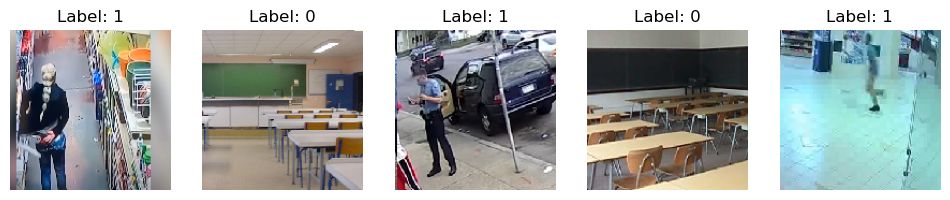

In [33]:
def display_random_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        # Select a random image
        idx = random.randint(0, len(images) - 1)
        img = images[idx]
        label = labels[idx]
        
        # Display the image and its label
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img.astype("uint8"))
        plt.title(f'Label: {class_names[label]}')
        plt.axis('off')
    plt.show()

# Display 5 random images
display_random_images(images, labels, class_names, num_images=5)

# splitting the dataset into training and validation set

In [34]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=VALIDATION_SPLIT, random_state=42)


# data augmentation to increase size of training and validation set

In [35]:
# Create image generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [36]:
# Only rescaling for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=BATCH_SIZE
)

validation_generator = validation_datagen.flow(
    X_val, y_val,
    batch_size=BATCH_SIZE
)


# cnn model architechture

In [37]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [39]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(X_val) // BATCH_SIZE
)

Epoch 1/10
23/23 [==============================] - 11s 467ms/step - loss: 0.6951 - accuracy: 0.5707 - val_loss: 0.6847 - val_accuracy: 0.5813
Epoch 2/10
23/23 [==============================] - 10s 448ms/step - loss: 0.6782 - accuracy: 0.6168 - val_loss: 0.6937 - val_accuracy: 0.5562
Epoch 3/10
23/23 [==============================] - 9s 395ms/step - loss: 0.6646 - accuracy: 0.6168 - val_loss: 0.6846 - val_accuracy: 0.5750
Epoch 4/10
23/23 [==============================] - 9s 387ms/step - loss: 0.6509 - accuracy: 0.6264 - val_loss: 0.6281 - val_accuracy: 0.6562
Epoch 5/10
23/23 [==============================] - 10s 413ms/step - loss: 0.6282 - accuracy: 0.6522 - val_loss: 0.5918 - val_accuracy: 0.7000
Epoch 6/10
23/23 [==============================] - 9s 398ms/step - loss: 0.6432 - accuracy: 0.6726 - val_loss: 0.5422 - val_accuracy: 0.7312
Epoch 7/10
23/23 [==============================] - 9s 389ms/step - loss: 0.6157 - accuracy: 0.6753 - val_loss: 0.5652 - val_accuracy: 0.7188
Epo

# plotting the loss and accuracy

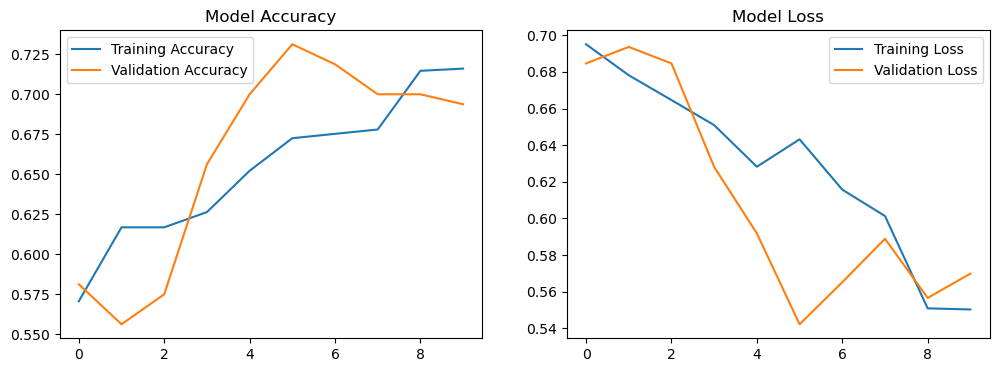

/Users/rohanshenoy/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Save the model
model.save('binary_classification_model.h5')


# function to use the cnn for different images

In [41]:
# Function to predict and display an image
def predict_and_display(model, image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Determine the class
    class_name = "Human" if prediction[0][0] > 0.6 else "No Human"
    
    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {class_name} (Confidence: {prediction[0][0]:.2f})")
    plt.axis('off')
    plt.show()


# Load the saved model
loaded_model = tf.keras.models.load_model('binary_classification_model.h5')


1/1 [==============================] - 0s 139ms/step


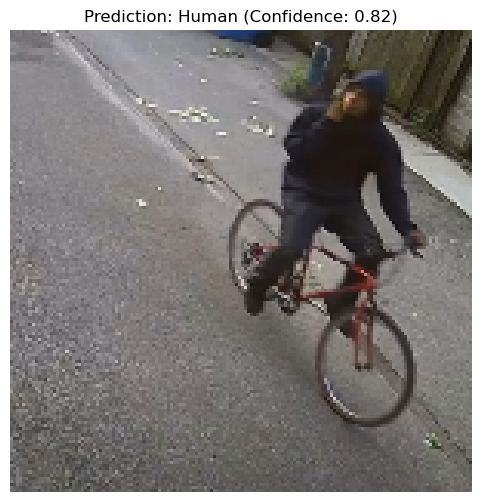

In [42]:

# Predict and display the test image
predict_and_display(loaded_model, '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset/1/2.png')


1/1 [==============================] - 0s 17ms/step


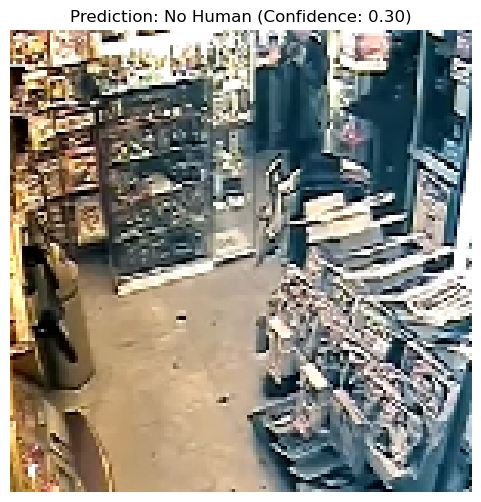

In [43]:
predict_and_display(loaded_model, '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset/0/4.png')


1/1 [==============================] - 0s 18ms/step


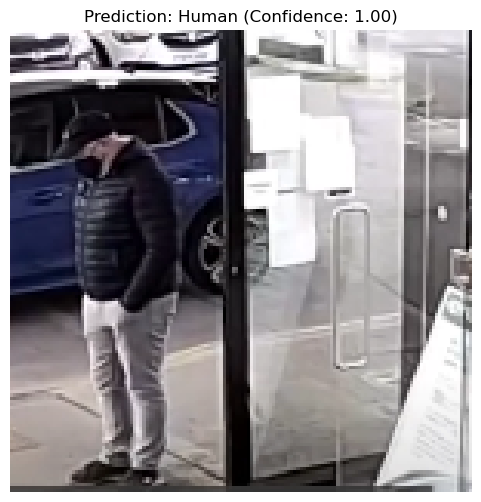

In [44]:
predict_and_display(loaded_model, '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset/1/9.png')


1/1 [==============================] - 0s 19ms/step


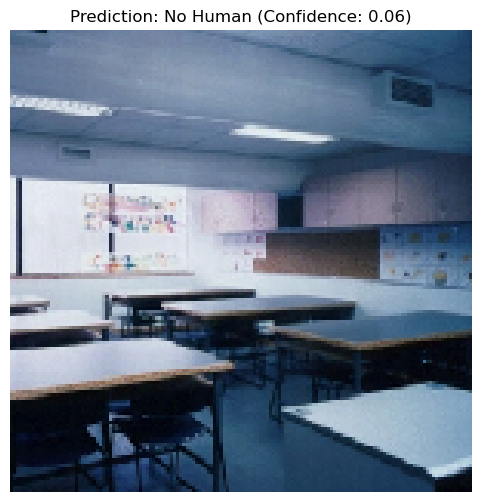

In [45]:
predict_and_display(loaded_model, '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset/0/10.png')



1/1 [==============================] - 0s 18ms/step


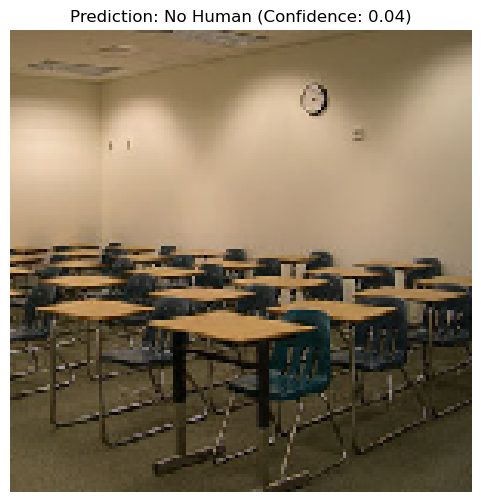

In [46]:
predict_and_display(loaded_model, '/Users/rohanshenoy/Desktop/aero/deep learning/human detection dataset/0/7.png')